# Market Research Zara Sales

In [41]:
# Import Libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
from dateutil import parser
import time

import pickle
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [45]:
# Read the dataset
df = pd.read_csv("zara.csv", sep = ';')

In [46]:
df.head(10)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
5,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-...,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN
6,189118,Front of Store,Yes,Clothing,Yes,952,Zara,https://www.zara.com/us/en/faux-leather-puffer...,278112470-800-2,FAUX LEATHER PUFFER JACKET,Faux leather puffer jacket. High collar and lo...,69.99,USD,2024-02-19T08:50:09.688951,jackets,MAN
7,182157,Aisle,No,Clothing,No,2421,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,322972485-431-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.00,USD,2024-02-19T08:50:10.200777,jackets,MAN
8,141861,Aisle,Yes,Clothing,Yes,1916,Zara,https://www.zara.com/us/en/100-wool-suit-jacke...,313854165-401-46,100% WOOL SUIT JACKET,Jacket made of Italian wool. Pointed lapel col...,169.00,USD,2024-02-19T08:50:10.880741,jackets,MAN
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.00,USD,2024-02-19T08:50:11.380061,jackets,MAN


In [ ]:
# Dropping few columns which we think are not required

In [47]:
zara_sales_df = df.drop(columns=['brand', 'url', 'sku','description','scraped_at'])

In [49]:
zara_sales_df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,name,price,currency,terms,section
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN


In [ ]:
UNDERSTANDING DATA

Product ID: Unique id for each product.

Product Position: The position of the product in the catalog or store layout.

Promotion: INdicates if the product is pomoted or not

Product Category: The category is clothing as Zara is a clothing Brand

Seasonal: Indicator of whether the product is part of a specific seasonal collection.

Sales Volume: The quantity of products sold.

Brand: Brand is Zara

URL: Product URL (e.g., if the product is sold online).

SKU: Stock Keeping Unit, a unique code used to identify items available for sale.

UNDERSTANDING DATA

Product ID: Unique id for each product.

Product Position: The position of the product in the catalog or store layout.

Promotion: INdicates if the product is pomoted or not

Product Category: The category is clothing as Zara is a clothing Brand

Seasonal: Indicator of whether the product is part of a specific seasonal collection.

Sales Volume: The quantity of products sold.

Brand: Brand is Zara

URL: Product URL (e.g., if the product is sold online).

SKU: Stock Keeping Unit, a unique code used to identify items available for sale.

Name: Name of the product.

Description: Description of the product.

Price: Price of the product.

Currency: Currency is USD

Scraped_at: The time when the data was scraped (e.g., in web scraping process).

Terms: Type pf clothing like jacke

Section: Indicates the Section e.g., women's clothing, men's clothing

# EDA

In [50]:
# Check the number of rows and number of columns in a dataset
zara_sales_df.shape

(252, 11)

In [55]:
#renaming few columns to a proper format
zara_sales_df.rename(columns={'Sales Volume': 'sales_volume'}, inplace=True)
zara_sales_df.rename(columns={'Product ID': 'product_id'}, inplace=True)
zara_sales_df.rename(columns={'Product Position': 'product_position'}, inplace=True)
zara_sales_df.rename(columns={'Promottion': 'promotion'}, inplace=True)
zara_sales_df.rename(columns={'Product Category': 'product_category'}, inplace=True)
zara_sales_df.rename(columns={'Seasonal': 'seasonal'}, inplace=True)
zara_sales_df.rename(columns={'terms': 'product_type'}, inplace=True)

In [56]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN


In [51]:
# Check the data types
zara_sales_df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
name                 object
price               float64
currency             object
terms                object
section              object
dtype: object

In [59]:
zara_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        252 non-null    int64  
 1   product_position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   product_category  252 non-null    object 
 4   seasonal          252 non-null    object 
 5   sales_volume      252 non-null    int64  
 6   name              251 non-null    object 
 7   price             252 non-null    float64
 8   currency          252 non-null    object 
 9   product_type      252 non-null    object 
 10  section           252 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 21.8+ KB


In [38]:
# Check the distribution of numerical columns
zara_sales_df[["price", "Sales Volume"]].describe()

,price,Sales Volume
count,252.000000,252.000000
mean,86.252540,1823.702381
std,52.083205,697.703748
min,7.990000,529.000000
25%,49.900000,1243.000000
50%,79.900000,1839.500000
75%,109.000000,2398.750000
max,439.000000,2989.000000


In [60]:
# Check for the null values
zara_sales_df.isna().sum()

product_id          0
product_position    0
Promotion           0
product_category    0
seasonal            0
sales_volume        0
name                1
price               0
currency            0
product_type        0
section             0
dtype: int64

In [63]:
#Remove the row with a null value
zara_sales_df=zara_sales_df.dropna(subset= ['name'])      

In [64]:
zara_sales_df.isna().sum()

product_id          0
product_position    0
Promotion           0
product_category    0
seasonal            0
sales_volume        0
name                0
price               0
currency            0
product_type        0
section             0
dtype: int64

In [65]:
# Check for the duplicated values
zara_sales_df.duplicated().sum()

0

In [37]:
# We dont have any duplicated values
# But we have got one null value and we dropped that row.

In [66]:
zara_sales_df.shape

(251, 11)

In [68]:
# Adding 'Total_Price' as new column by multiplying 'sales_volume'  and 'price' which would give us 
#the total revenue generated for that particulare 'product_category'
zara_sales_df['total_price'] = zara_sales_df['price'] * zara_sales_df['sales_volume']

In [69]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section,total_price
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,408938.00


# Check the distribution of Price and Sales Volume 

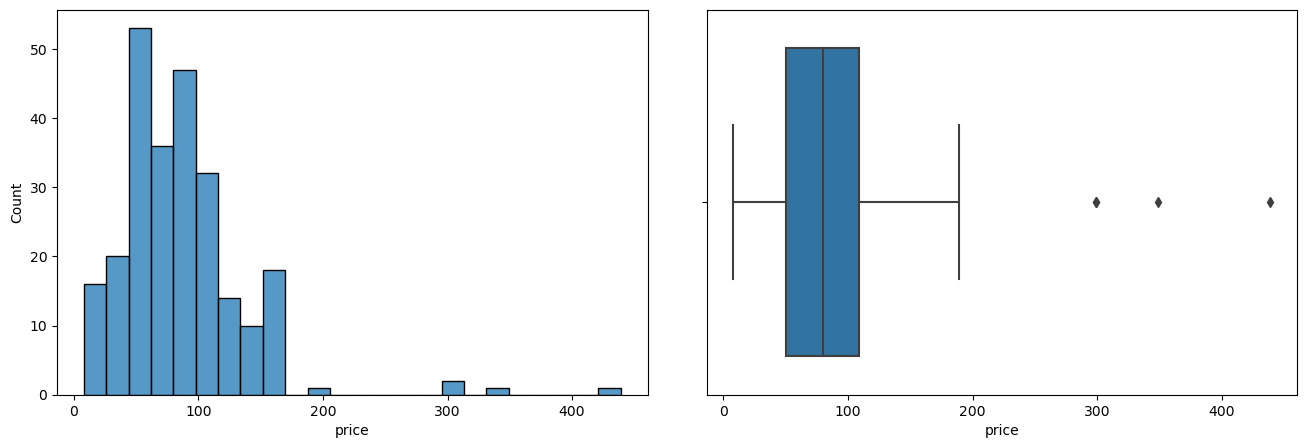

In [70]:
# Price distribution:
fig, axs = plt.subplots(1,2,figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(zara_sales_df['price'], ax = axs[0])
sns.boxplot(x = zara_sales_df['price'], ax = axs[1])
plt.show() 

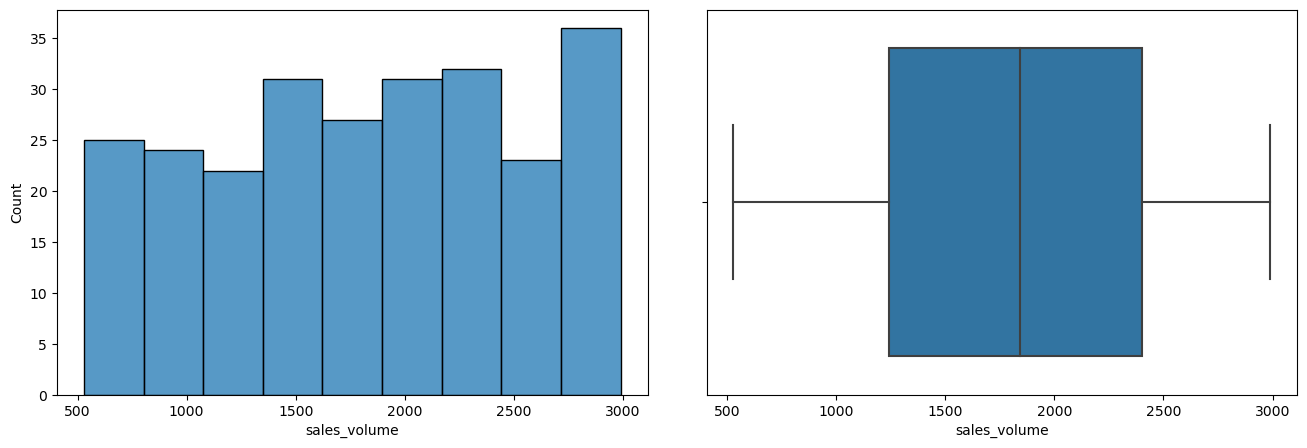

In [73]:
# Sales Volume distribution:
fig, axs = plt.subplots(1,2,figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(zara_sales_df['sales_volume'], ax = axs[0])
sns.boxplot(x = zara_sales_df['sales_volume'], ax = axs[1])
plt.show() 

1. Analysing which section of the store (men's or women's section) influence the most of the sales at store?

In [83]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section,total_price
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,408938.00


In [85]:
# Here let's group both sections of gender
zara_sales_df.groupby('section')

In [88]:
#Let's find the sum of sales against the section of users
sales_by_section_wise = zara_sales_df.groupby('section')['sales_volume'].sum()
sales_by_section_wise

section
MAN      394361
WOMAN     63374
Name: sales_volume, dtype: int64

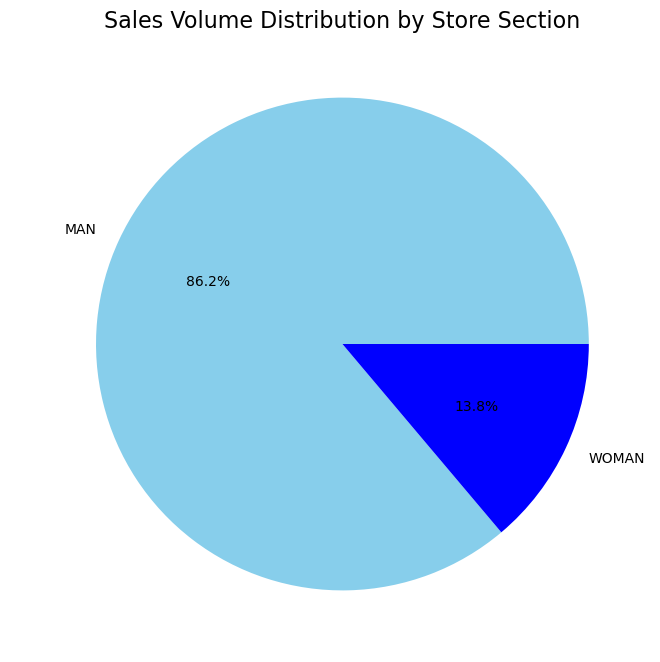

In [91]:
# Plotting
plt.figure(figsize=(10, 8))
sales_by_section_wise.plot(kind='pie', autopct='%.1f%%', colors=['skyblue', 'blue'])
plt.title('Sales Volume Distribution by Store Section', fontsize= 16)
plt.ylabel(' ')       #rechanging the y label to blank as default populated as sales_volume
plt.show()

2. Which product has highest average sales revenue

In [ ]:
# Lets group by the data according to "product_type" column

In [76]:
zara_sales_df.groupby('product_type')

In [81]:
x= zara_sales_df.groupby('product_type')['total_price'].mean()
x

product_type
jackets     189530.315612
jeans       108048.156250
shoes       121123.794516
sweaters     99771.499512
t-shirts    115525.195312
Name: total_price, dtype: float64

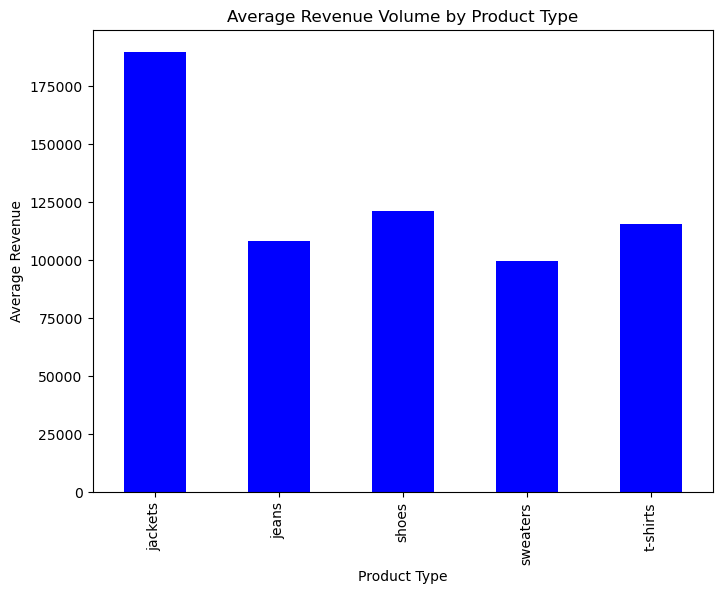

In [80]:
plt.figure(figsize=(8, 6))
a.plot(kind='bar', color='blue')
plt.title('Average Revenue Volume by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Revenue')
plt.show()

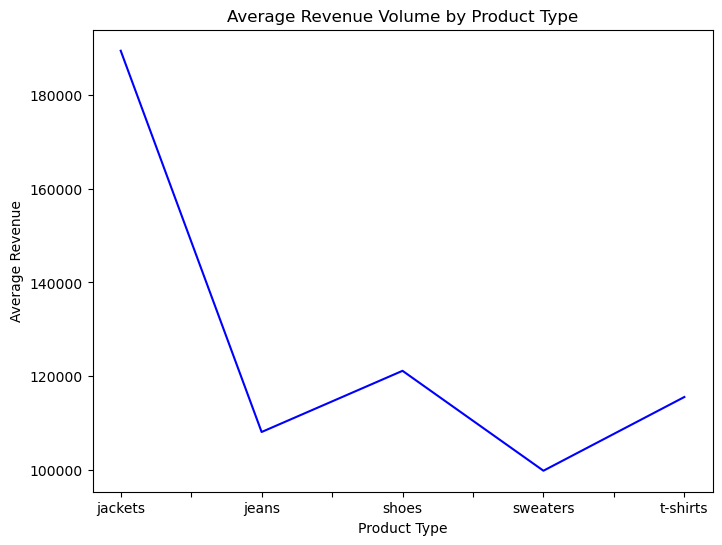

In [82]:
plt.figure(figsize=(8, 6))
a.plot(kind='line', color='blue')
plt.title('Average Revenue Volume by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Revenue')
plt.show()

3. Analyzing the sales volumes based on product position

In [92]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section,total_price
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,408938.00


In [96]:
# Group by the data by product positoning
zara_sales_df.groupby('product_position')

In [98]:
#selecting sales volume against product positions and suming the values of the sales generated
sales_analysis_based_on_product_position= zara_sales_df.groupby('product_position')['sales_volume'].sum()
sales_analysis_based_on_product_position

product_position
Aisle             177396
End-cap           151092
Front of Store    129247
Name: sales_volume, dtype: int64

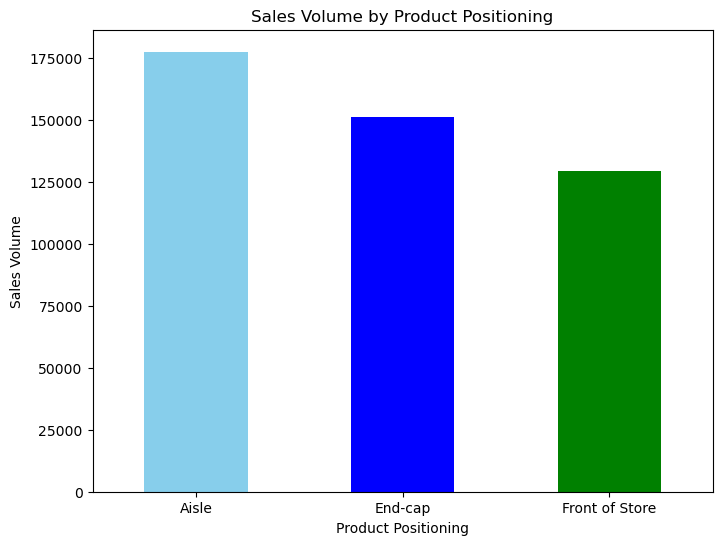

In [118]:
#Plotting
plt.figure(figsize=(8, 6))
sales_analysis_based_on_product_position.plot(kind='bar', color=['skyblue', 'blue', 'green'])
plt.title('Sales Volume by Product Positioning')
plt.xlabel('Product Positioning')
plt.ylabel('Sales Volume')
plt.xticks(rotation = 360)
plt.show()

4. How revenue is influenced by promotions?

In [101]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section,total_price
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,408938.00


In [102]:
#fetching count to see how many products we promoted
zara_sales_df['Promotion'].value_counts()

No     132
Yes    119
Name: Promotion, dtype: int64

In [105]:
# Now lets calculate the revenue against each product which was promoted or not promoted 
Revenue_after_promotion = zara_sales_df.groupby('Promotion')['total_price'].sum()
Revenue_after_promotion

Promotion
No     18994089.58
Yes    19757284.90
Name: total_price, dtype: float64

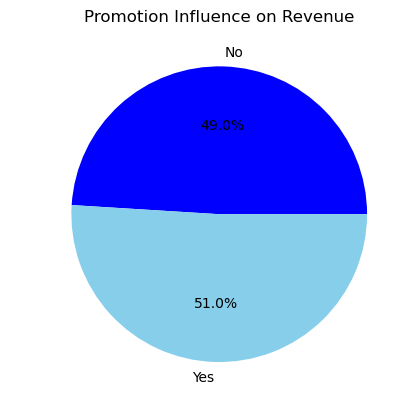

In [119]:
# Pie chart
colors= ['blue','skyblue'] #source:https://htmlcolorcodes.com/
Revenue_after_promotion.plot(kind ='pie',autopct='%.1f%%', colors=colors)
plt.title('Promotion Influence on Revenue')
plt.ylabel(' ')
plt.show()

In [ ]:
5. Analysing the pricing range most preferred by customers?

In [109]:
zara_sales_df.head()

,product_id,product_position,Promotion,product_category,seasonal,sales_volume,name,price,currency,product_type,section,total_price
0,185102,Aisle,No,Clothing,No,2823,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,TUXEDO JACKET,169.00,USD,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,408938.00


In [112]:
# checking the highest product price range
zara_sales_df['price'].value_counts().head(10)

89.9     39
69.9     35
109.0    26
59.9     18
49.9     18
129.0    14
39.9     14
45.9     13
169.0    12
139.0    10
Name: price, dtype: int64

In [115]:
#checking the sum of sales volume generated based on the product pricing 
s=zara_sales_df.groupby('price')['sales_volume'].sum()
s

price
7.99       3285
9.99       5047
12.99      9241
19.90      2646
19.99     12878
27.90      4739
29.90      1831
29.99      2929
35.90      4531
39.90     27669
45.90     19574
47.90      7939
49.90     25552
59.90     32592
69.90     64865
69.99       952
79.90     16575
89.90     73292
99.90     12277
109.00    43434
129.00    29734
139.00    17360
159.00    11234
169.00    19135
189.00     2366
299.00     3469
349.00     1860
439.00      729
Name: sales_volume, dtype: int64

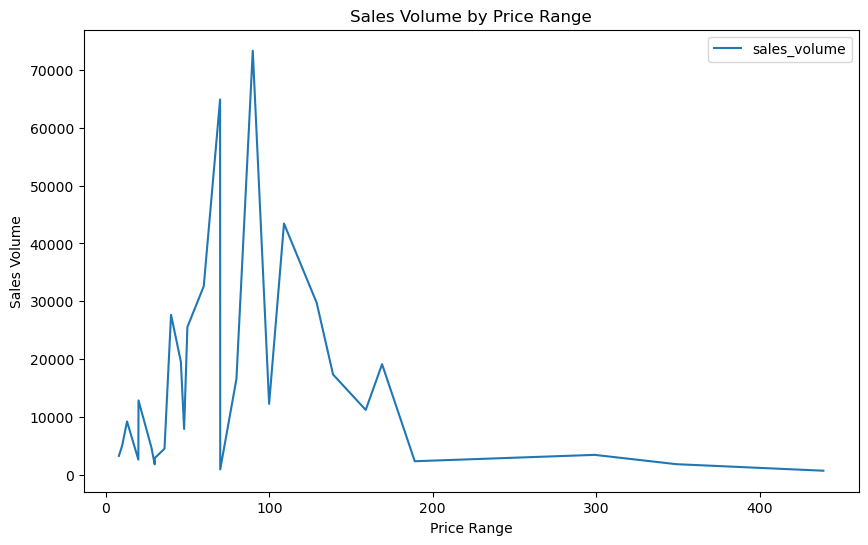

In [116]:
#Plotting
plt.figure(figsize=(10, 6))

s.plot(kind= 'line')

plt.title('Sales Volume by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

In [117]:
s1=df.groupby('price')['sales_volume'].sum().sort_values(ascending = False).head()
s1

price
89.9     73292
69.9     64865
109.0    43434
59.9     32592
129.0    29734
Name: sales_volume, dtype: int64

Overall Analysis

Out of all the products on store jackets are the major contibutor towards the revenue

Based on the positioning of products highest number of sales generated were thorugh products placed as aisle

Based on Product Position- men preferred to choose from the aisle whereas women chose to shop from the end-cap

Revneue generated from products is $19757284.90 which is 51% of the total revenue

Consumers preferred shopping from the price range of  60.00 to 130.00